In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

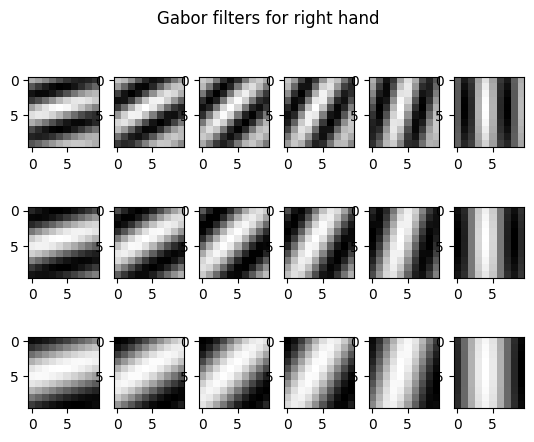

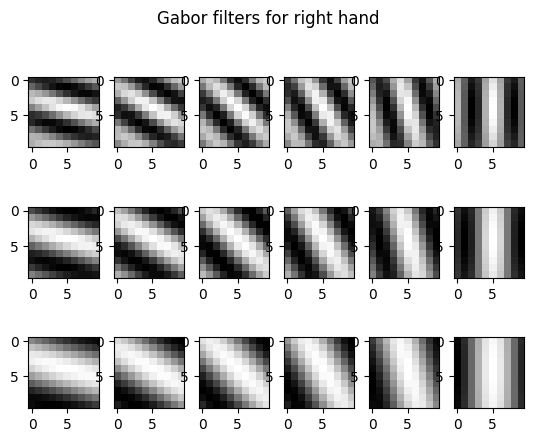

In [3]:
class Gabor():
    def __init__(self, R, C, n_orientation, scale, flip = False):
        self.R = R
        self.C = C
        self.n_orientation = n_orientation
        self.scale = scale
        self.orientation = np.array([ (u * np.pi / n_orientation) for u in range (1, n_orientation + 1)])
        self.gabor_filters_sets = [gabor_wavelet(R, C, u, scale, n_orientation, flip) for u in range(1, n_orientation + 1)]
        self.flip = flip            # flip filter for left hand
    

    # filter image through gabor filters
    def filtering(self, img):
        graphs = np.array([cv2.filter2D(img, -1, np.real(gw)) for gw in self.gabor_filters_sets])
        return graphs
    
    def plot_filters(self, n_scale):
        gabor_filters = []
        fig = plt.figure()
        fig.suptitle("Gabor filters for right hand")  # Thêm tiêu đề cho figure
        for v in range (1, n_scale + 1):
            for u in range(1, self.n_orientation + 1):
                gw = gabor_wavelet(self.R, self.C, u, v , self.n_orientation, self.flip)
                fig.add_subplot(n_scale, self.n_orientation, self.n_orientation * (v- 1) + u)
                plt.imshow(np.real(gw), cmap='gray')
        plt.show()

    

def gabor_wavelet(rows, cols, orientation, scale, n_orientation, flip):
    kmax = np.pi / 2        # 1.5707963267948966
    f = np.sqrt(2)          # 1.4142135623730951 
    delt2 = (2 * np.pi) ** 2
    k = (kmax / (f ** scale)) * np.exp(1j * orientation * np.pi / n_orientation / 2)
    kn2 = np.abs(k) ** 2
    gw = np.zeros((rows, cols), np.complex128)

    for m in range(int(-rows / 2) + 1, int(rows / 2) + 1):
        for n in range(int(-cols / 2) + 1, int(cols / 2) + 1):
            t1 = np.exp(-0.5 * kn2 * (m ** 2 + n ** 2) / delt2)
            t2 = np.exp(1j * (np.real(k) * m + np.imag(k) * n))
            t3 = np.exp(-0.5 * delt2)
            gw[int(m + rows / 2 - 1), int(n + cols / 2 - 1)] = (kn2 / delt2) * t1 * (t2 - t3)


    if (flip == True):
        gw = np.fliplr(gw)

    return gw



# RGA (gabor filter for right hand)
n_orientation = 6
scale = 2
RGA = Gabor(10, 10, n_orientation, scale)
right_gabor_filters = RGA.gabor_filters_sets
RGA.plot_filters(3)

# LGA (gabor filter for right hand)
n_orientation = 6
scale = 2
LGA = Gabor(10, 10, n_orientation, scale, flip = True)
left_gabor_filters = LGA.gabor_filters_sets
LGA.plot_filters(3)

